In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [6]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [9]:
# 1.2 One way Anova for Education
formula= 'Salary~Education'
model=ols(formula,df).fit()
anova_table=anova_lm(model)
print(anova_table)

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [11]:
# 1.3 One way Anova for Occupation
formula= 'Salary~Occupation'
model=ols(formula,df).fit()
anova_table=anova_lm(model)
print(anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [5]:
# 1.4
#tukey test
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Salary'], df['Education'])
result = mc.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


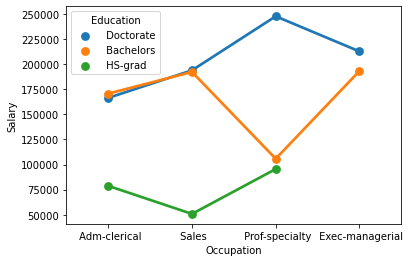

In [32]:
# 1.5 interaction between the two treatments
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education', ci=False);

In [33]:
# 1.6 Two way Anova for Education and Occupation with interaction
formula= 'Salary~Education + Occupation + Education:Occupation'
model=ols(formula,df).fit()
anova_table=anova_lm(model)
print(anova_table)

                        df        sum_sq       mean_sq          F  \
Education              2.0  1.026955e+11  5.134773e+10  72.211958   
Occupation             3.0  5.519946e+09  1.839982e+09   2.587626   
Education:Occupation   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education             5.466264e-12  
Occupation            7.211580e-02  
Education:Occupation  2.232500e-05  
Residual                       NaN  
